# Trabajo Práctico 2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

# Lectura de datos

In [2]:
data = pd.read_csv('../datasets/pulsar-stars/pulsar_stars.csv')

In [3]:
data.columns = [col.strip() for col in data.columns]

#### Renombrado de columnas:

Decidimos renombrar las colunmas pasándolas a español para hacerlas más "entendibles" a simple vista.

In [4]:
NOMBRES_COLUMNAS = {
    'Mean of the integrated profile' : 'media del perfil integrado',
    'Standard deviation of the integrated profile' : 'desviacion estandar del perfil integrado',
    'Excess kurtosis of the integrated profile' : 'exceso de curtosis del perfil integrado',
    'Skewness of the integrated profile' : 'sesgo del perfil integrado',
    'Mean of the DM-SNR curve' : 'media de la curva DM-SNR',
    'Standard deviation of the DM-SNR curve' : 'desviacion estandar de la curva DM-SNR',
    'Excess kurtosis of the DM-SNR curve' : 'exceso de curtosis de la curva DM-SNR',
    'Skewness of the DM-SNR curve' : 'sesgo de la curva DM-SNR',
    'target_class' : 'target_class'
}
data.rename(columns=NOMBRES_COLUMNAS, inplace=True)

In [5]:
data.dtypes

media del perfil integrado                  float64
desviacion estandar del perfil integrado    float64
exceso de curtosis del perfil integrado     float64
sesgo del perfil integrado                  float64
media de la curva DM-SNR                    float64
desviacion estandar de la curva DM-SNR      float64
exceso de curtosis de la curva DM-SNR       float64
sesgo de la curva DM-SNR                    float64
target_class                                  int64
dtype: object

In [6]:
data.isnull().sum()

media del perfil integrado                  0
desviacion estandar del perfil integrado    0
exceso de curtosis del perfil integrado     0
sesgo del perfil integrado                  0
media de la curva DM-SNR                    0
desviacion estandar de la curva DM-SNR      0
exceso de curtosis de la curva DM-SNR       0
sesgo de la curva DM-SNR                    0
target_class                                0
dtype: int64

In [7]:
data.head()

,media del perfil integrado,desviacion estandar del perfil integrado,exceso de curtosis del perfil integrado,sesgo del perfil integrado,media de la curva DM-SNR,desviacion estandar de la curva DM-SNR,exceso de curtosis de la curva DM-SNR,sesgo de la curva DM-SNR,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Feature Engineering

Al realizar el análisis de los datos, no encontramos una mejora necesaria para aplicar a los datos, quizás esto se deba al desconocimiento que poseemos en el campo del problema.
En un principio, supusimos que hacer un redondeo en los decimales de los datos, los resultados mejorarían, ya que al tener tantos decimales imaginábamos que los modelos podrían sobre entrenarse. Haciendo las pruebas y comparando, observamos que los resultados no mejoraban significativamente, y hasta en algunos casos, el resultado empeoraba (muy poco), por lo que decidimos no aplicar ningún cambio a los datos de entrada.

In [8]:
#data.round(4)

### Variables de entrada:
- media del perfil integrado
- desviacion estandar del perfil integrado
- exceso de curtosis del perfil integrado
- sesgo del perfil integrado
- media de la curva DM-SNR
- desviacion estandar de la curva DM-SNR
- exceso de curtosis de la curva DM-SNR
- sesgo de la curva DM-SNR
    
Decidimos utilizar todas las variables sin ningún tipo de transformación.

### Train y Test

In [9]:
#train , test = train_test_split(data,test_size = .3,random_state = 123)
train, not_train = train_test_split(data, test_size=0.4)
validation, test = train_test_split(not_train, test_size=0.5)

In [10]:
def evaluate_model(model, extract_inputs_function, extract_outputs_function, include_validation=True):
    sets = [('train', train), ('test', test)]
    if include_validation:
        sets.append(('validation', validation))
        
    for set_name, set_data in sets:
        inputs = extract_inputs_function(set_data)
        outputs = extract_outputs_function(set_data)
        predictions = model.predict(inputs)
        
        print(set_name, '#' * 80)
        
        # print metrics
        
        print('Accuracy:', accuracy_score(outputs, predictions))
        print('Precision:', precision_score(outputs, predictions))
        print('Recall:', recall_score(outputs, predictions))
        print('F1-score:', f1_score(outputs, predictions))
        print()
        print ("\nclassification report :\n",(classification_report(outputs,predictions)))
        print()
        
        # plot confussion matrix
        
        
        plt.figure(figsize=(13,10))
        plt.subplot(221)
        sns.heatmap(confusion_matrix(outputs,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
        plt.title("CONFUSION MATRIX",fontsize=20)
        plt.xticks([0, 1], ['no star', 'star'], rotation=45)
        plt.yticks([0, 1], ['no star', 'star'])
        plt.xlabel('Predicted class')
        plt.ylabel('True class')
        
        #plt.figure(figsize=(3,4))        
        #plt.xticks([0, 1], ['no star', 'star'], rotation=45)
        #plt.yticks([0, 1], ['no star', 'star'])
        #plt.xlabel('Predicted class')
        #plt.ylabel('True class')
        #plt.title(set_name)
        #plt.imshow(
            #confusion_matrix(outputs, predictions), 
            #cmap=plt.cm.Reds, 
            #interpolation='nearest',
        #)

        plt.show()

### Definición de la métrica
Teniendo en cuenta que nuestro dataset está muy desbalanceado, la elección de "Accuracy" como métrica no sería una buena opción. Por otro lado, nos interesa encontrar todos los casos positivos, ya que son pocos en relación al dataset.
La métrica que vamos a utilizar va a ser "F1-Score", ya que combina "Recall" para que no se nos escape ningún caso positivo, y "Precision" para encontrar los casos que son realmente positivos.

## Primer Modelo: Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [12]:
# final input columns, in the order we want to use them
LR_INPUT_COLUMNS = [x for x in data.columns if x not in ["target_class"]]

def lr_extract_inputs(dataset):
    """
    Inputs in the format supported by the logistic regressor.
    """
    inputs = dataset.copy() 
    
    return inputs[LR_INPUT_COLUMNS].values.astype(np.float64)

def lr_extract_outputs(dataset):
    """
    Outputs in the format supported by the logistic regressor.
    """
    return dataset.target_class.values

In [13]:

lr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression()),
])

In [14]:
lr_model.fit(
    lr_extract_inputs(train),
    lr_extract_outputs(train),
)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

train ################################################################################
Accuracy: 0.9775563419631216
Precision: 0.9352601156069364
Recall: 0.8138832997987927
F1-score: 0.8703604088219473


classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      9744
           1       0.94      0.81      0.87       994

   micro avg       0.98      0.98      0.98     10738
   macro avg       0.96      0.90      0.93     10738
weighted avg       0.98      0.98      0.98     10738




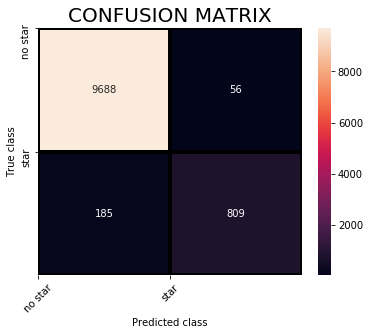

test ################################################################################
Accuracy: 0.9784916201117319
Precision: 0.9397590361445783
Recall: 0.7905405405405406
F1-score: 0.8587155963302753


classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3284
           1       0.94      0.79      0.86       296

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.89      0.92      3580
weighted avg       0.98      0.98      0.98      3580




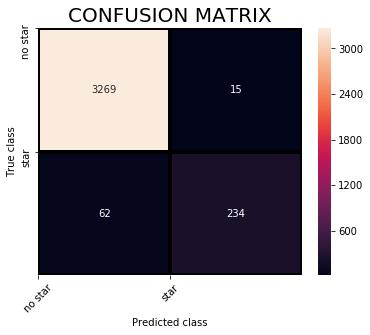

validation ################################################################################
Accuracy: 0.9801675977653631
Precision: 0.9695945945945946
Recall: 0.8223495702005731
F1-score: 0.8899224806201551


classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3231
           1       0.97      0.82      0.89       349

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.98      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580




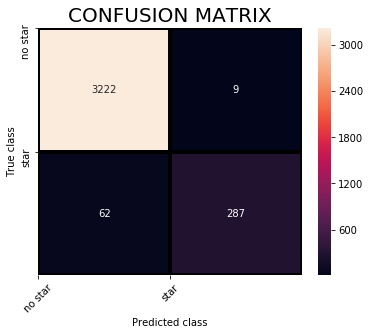

In [15]:
evaluate_model(lr_model, lr_extract_inputs, lr_extract_outputs)

### Conclusiones
El modelo tiene un alto porcentaje de aciertos en F1-score (superior a 85%) para casos positivos de estrellas en Test y Validation. Esto concuerda con el análisis del dataset realizado en el TP anterior, ya que observamos a través de los graficos, que los datos podrían representarse muy bien con una regresión.

Para ser un modelo sencillo y muy rápido de ejecutar es un resultado muy bueno.

## Segundo Modelo: K nearest neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
K = 5

knn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=K)),
])

In [18]:
knn_model.fit(
    lr_extract_inputs(train),
    lr_extract_outputs(train),
)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

train ################################################################################
Accuracy: 0.9814676848575153
Precision: 0.9401993355481728
Recall: 0.8541247484909457
F1-score: 0.8950975224037955


classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9744
           1       0.94      0.85      0.90       994

   micro avg       0.98      0.98      0.98     10738
   macro avg       0.96      0.92      0.94     10738
weighted avg       0.98      0.98      0.98     10738




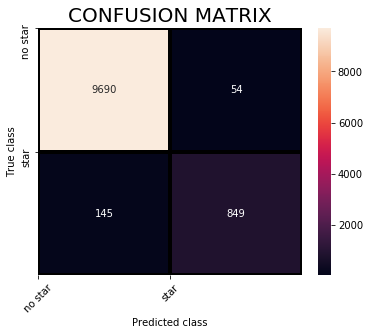

test ################################################################################
Accuracy: 0.979050279329609
Precision: 0.9367588932806324
Recall: 0.8006756756756757
F1-score: 0.8633879781420765


classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3284
           1       0.94      0.80      0.86       296

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580




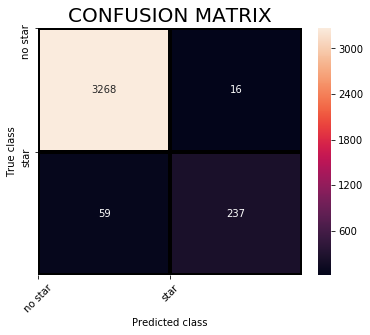

validation ################################################################################
Accuracy: 0.979050279329609
Precision: 0.959731543624161
Recall: 0.8194842406876791
F1-score: 0.884080370942813


classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3231
           1       0.96      0.82      0.88       349

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.97      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580




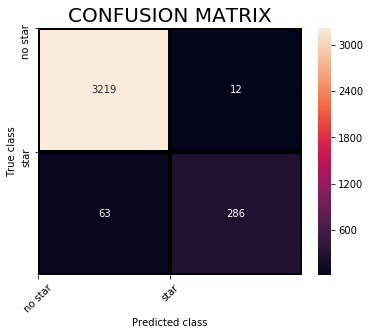

In [19]:
evaluate_model(knn_model, lr_extract_inputs, lr_extract_outputs)

### Conclusión
Al realizar el análisis del dataset en el TP anterior, observamos a través de los distintos gráficos que los datos se podían separar o agrupar fácilmente a partir de la variable de salida, por lo que decidimos probar crear un modelo k-NN. El resultado de aplicar dicho modelo fue el esperado, un porcentaje alto (por encima del 85%) para casos positivos en nuestra métrica F1-Score, tanto en Test como en Validation.

Para ser un modelo sencillo y muy rápido de ejecutar es un resultado muy bueno.

## Tercer Modelo: Decision Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
TREE_INPUT_COLUMNS = [
    'exceso de curtosis del perfil integrado',
    'sesgo del perfil integrado',
    'media del perfil integrado',
    'exceso de curtosis de la curva DM-SNR',
    'sesgo de la curva DM-SNR',
    'desviacion estandar del perfil integrado',
    'media de la curva DM-SNR',
    'desviacion estandar de la curva DM-SNR',
]

#TREE_INPUT_COLUMS = [x for x in data.columns if x not in ["target_class"]]

def tree_extract_inputs(dataset):
    """
    Inputs in the format supported by the logistic regressor.
    """
    # we don't want to modify the original dataset, that we will use with other models
    inputs = dataset.copy()
    
    # return the raw numbers
    return inputs[TREE_INPUT_COLUMNS].values

def tree_extract_outputs(dataset):
    """
    Outputs in the format supported by the logistic regressor.
    """
    return dataset.target_class.values

In [51]:
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [52]:
tree_model.fit(
    tree_extract_inputs(train),
    tree_extract_outputs(train),
)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

train ################################################################################
Accuracy: 0.9810020487986589
Precision: 0.9379157427937915
Recall: 0.8511066398390342
F1-score: 0.8924050632911392


classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      9744
           1       0.94      0.85      0.89       994

   micro avg       0.98      0.98      0.98     10738
   macro avg       0.96      0.92      0.94     10738
weighted avg       0.98      0.98      0.98     10738




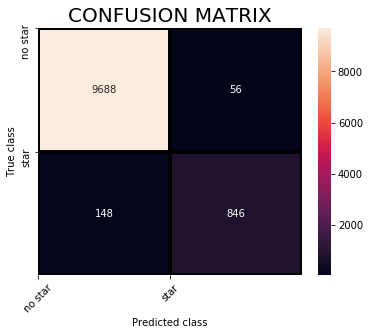

test ################################################################################
Accuracy: 0.9798882681564246
Precision: 0.9341085271317829
Recall: 0.8141891891891891
F1-score: 0.8700361010830324


classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3284
           1       0.93      0.81      0.87       296

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580




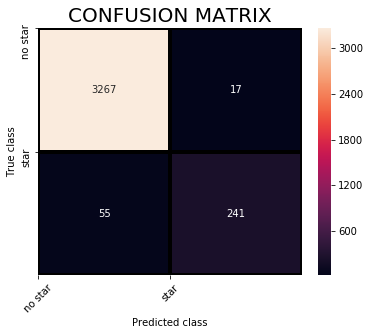

validation ################################################################################
Accuracy: 0.9807262569832402
Precision: 0.9545454545454546
Recall: 0.8424068767908309
F1-score: 0.8949771689497716


classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3231
           1       0.95      0.84      0.89       349

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580




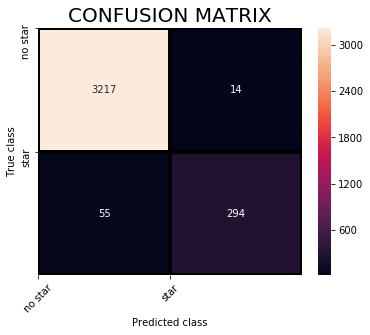

In [53]:
evaluate_model(tree_model, tree_extract_inputs, tree_extract_outputs)

### Conclusión

El resultado tanto en Test como en Validation es muy bueno (superior al 85%) para casos positivos. Probando con distintos valores para max_depth, encontramos que el mejor resultado lo arrojaba con max_depth=5, ya que con valores superiores, el modelo empezaba a sobre entrenarse, y con valores menores, el porcentaje de aciertos era inferior.

## Random Forests

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [301]:
forest_model = RandomForestClassifier(max_depth=8)

In [302]:
forest_model.fit(
    tree_extract_inputs(train),
    tree_extract_outputs(train),
)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

train ################################################################################
Accuracy: 0.9864034270813932
Precision: 0.9814169570267132
Recall: 0.8666666666666667
F1-score: 0.920479302832244


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      9763
           1       0.98      0.87      0.92       975

   micro avg       0.99      0.99      0.99     10738
   macro avg       0.98      0.93      0.96     10738
weighted avg       0.99      0.99      0.99     10738




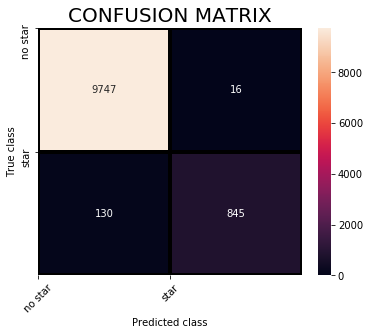

test ################################################################################
Accuracy: 0.9812849162011174
Precision: 0.95
Recall: 0.8456973293768546
F1-score: 0.8948194662480377


classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3243
           1       0.95      0.85      0.89       337

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580




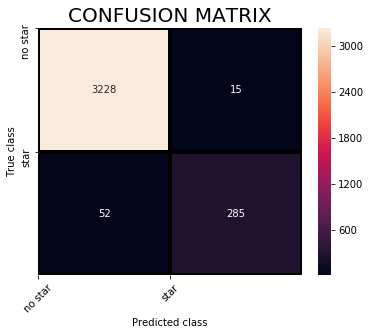

validation ################################################################################
Accuracy: 0.9776536312849162
Precision: 0.9075907590759076
Recall: 0.8409785932721713
F1-score: 0.873015873015873


classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3253
           1       0.91      0.84      0.87       327

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580




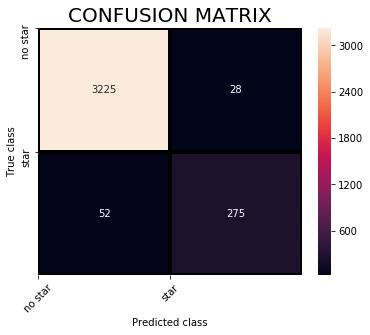

In [303]:
evaluate_model(forest_model, tree_extract_inputs, tree_extract_outputs)

#### Conclusion

## Gradient Boosted Trees

In [275]:
from sklearn.ensemble import GradientBoostingClassifier

In [304]:
boost_model = GradientBoostingClassifier(max_depth=5)

In [305]:
boost_model.fit(
    tree_extract_inputs(train),
    tree_extract_outputs(train),
)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

train ################################################################################
Accuracy: 0.9945054945054945
Precision: 0.9903640256959315
Recall: 0.9487179487179487
F1-score: 0.9690937663698272


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      9763
           1       0.99      0.95      0.97       975

   micro avg       0.99      0.99      0.99     10738
   macro avg       0.99      0.97      0.98     10738
weighted avg       0.99      0.99      0.99     10738




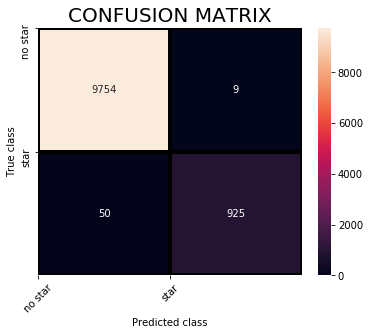

test ################################################################################
Accuracy: 0.9793296089385475
Precision: 0.9174603174603174
Recall: 0.857566765578635
F1-score: 0.8865030674846627


classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3243
           1       0.92      0.86      0.89       337

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.95      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580




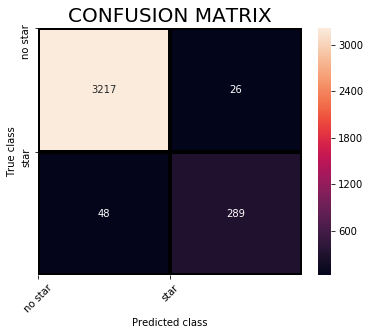

validation ################################################################################
Accuracy: 0.9776536312849162
Precision: 0.8847352024922118
Recall: 0.8685015290519877
F1-score: 0.8765432098765431


classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3253
           1       0.88      0.87      0.88       327

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.94      0.93      0.93      3580
weighted avg       0.98      0.98      0.98      3580




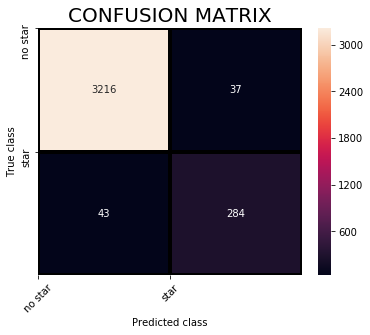

In [306]:
evaluate_model(boost_model, tree_extract_inputs, tree_extract_outputs)